In [1]:
import albumentations as A
import cv2
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
train_json = "/opt/ml/detection/dataset/train.json"
with open(train_json, "r", encoding="utf8") as outfile:
    json_data = json.load(outfile)

images = json_data["images"]
categories = json_data["categories"]
annotations = json_data["annotations"]

In [3]:
for annotation in annotations:
    image_id = annotation["image_id"]
    category_id = annotation["category_id"]
    bbox = annotation["bbox"]

    if 'bbox' in images[image_id]:
        images[image_id]['bbox'].append(bbox)
        images[image_id]['bbox'][-1].append(category_id)
    else:
        images[image_id]['bbox'] = [bbox]
        images[image_id]['bbox'][-1].append(category_id)

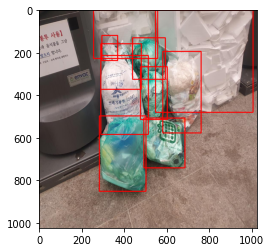

In [5]:
cate_dict = {
	'0' : 'General trash', '1' : 'Paper', '2' : 'Paper pack', '3' : 'Metal', 
	'4' : 'Glass', '5' : 'Plastic', '6' : 'Styrofoam', '7' : 'Plastic bag', 
	'8' : 'Battery', '9' : 'Clothing'
	}
image_id = 21 # 변경하면서 살펴보면 됨
image = cv2.imread(f"../dataset/train/{image_id:04}.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
bboxes = images[image_id]['bbox']
transform = A.Compose([
    # A.RandomCrop(width=450, height=450, p=1.0),
    # A.Flip(p=1.0),
    # A.RandomBrightnessContrast(brightness_limit=0.1, contrast_limit=0.15, p=1.0),
    # A.RandomResizedCrop(width=1024, height=1024, scale=(0.5, 1.0), p=1.0),
    # A.RandomSizedBBoxSafeCrop(width=1024, height=1024, p=1.0),
    # A.RandomBrightnessContrast(p=1.0),
    # A.RandomRotate90(p=1.0),
    # A.ShiftScaleRotate(p=1.0),
    # A.Blur(p=1.0),
    # A.GaussianBlur(p=1.0),
    # A.MedianBlur(blur_limit=5,p=1.0),
    # A.MotionBlur(p=1.0),
    # A.ColorJitter(brightness=0.1, contrast=0.15,saturation=0.2, hue=0.05,p=1.0)
], bbox_params=A.BboxParams(format='coco'))
transformed = transform(image=image, bboxes=bboxes)
transformed_image = transformed['image']
transformed_bboxes = transformed['bboxes']

for bbox in transformed_bboxes:
    x_min, y_min, w, h, cate = bbox
    x_min = int(x_min)
    y_min = int(y_min)
    w = int(w)
    h = int(h)
    cv2.rectangle(transformed_image, (x_min, y_min), (x_min+w, y_min+h), (255, 0, 0), 3)
plt.imshow(transformed_image)